In [1]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit

DATA_DIR = "data/datasets/"

ais = pd.read_csv(DATA_DIR+'training_set.csv', index_col=0, parse_dates = ['timestamp'])


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
ais_moving = ais[(ais.speed > 0.1)]

In [3]:
print(len(ais.mmsi))
print(len(ais_moving.mmsi))

14185046
9476581


In [4]:
ais.head()

timestamp       mmsi        lat        lon  speed  course  \
0 2017-11-02 11:19:07  205366000  54.347242   9.991140   4.01    56.6   
1 2017-11-02 11:30:58  205366000  54.360348  10.025337   4.17    77.5   
2 2017-11-02 11:37:58  205366000  54.359573  10.049203   4.48    92.4   
3 2017-11-02 11:44:07  205366000  54.365497  10.071320   3.81    44.9   
4 2017-11-02 11:56:08  205366000  54.370437  10.109498   2.73   103.6   

   heading  turnrate  breadth vessel_type  vessel_max_speed  draft   power  \
0     56.0       0.0    21.33           T              16.0   8.18  5820.0   
1     81.0       0.0    21.33           T              16.0   8.18  5820.0   
2     92.0       0.0    21.33           T              16.0   8.18  5820.0   
3     46.0       0.0    21.33           T              16.0   8.18  5820.0   
4    103.0       0.0    21.33           T              16.0   8.18  5820.0   

       dwt iceclass  
0  13289.0       IA  
1  13289.0       IA  
2  13289.0       IA  
3  13289.0       IA  
4  13289.0       IA

In [5]:
ais.describe()

mmsi           lat           lon         speed        course  \
count  1.418505e+07  1.418505e+07  1.418505e+07  1.417367e+07  1.409624e+07   
mean   2.330313e+08  5.791491e+01  1.802820e+01  3.865103e+00  1.737882e+02   
std    1.413574e+07  2.742039e+00  5.492925e+00  3.226343e+00  1.068604e+02   
min    2.053660e+08  5.349161e+01  9.423693e+00  0.000000e+00  0.000000e+00   
25%    2.190760e+08  5.551643e+01  1.257550e+01  0.000000e+00  7.100000e+01   
50%    2.317940e+08  5.768641e+01  1.854305e+01  4.840000e+00  1.880000e+02   
75%    2.454650e+08  5.990170e+01  2.189376e+01  6.120000e+00  2.586000e+02   
max    2.572220e+08  6.612300e+01  3.040683e+01  5.258000e+01  3.599000e+02   

            heading      turnrate       breadth  vessel_max_speed  \
count  1.383977e+07  1.386852e+07  1.418505e+07      1.377549e+07   
mean   1.734643e+02  1.095124e+00  1.866241e+01      1.453521e+01   
std    1.029694e+02  2.836595e+01  7.757992e+00      3.783029e+00   
min    0.000000e+00 -7.087100e+02  6.500000e+00      1.000000e+00   
25%    7.500000e+01  0.000000e+00  1.317000e+01      1.200000e+01   
50%    1.840000e+02  0.000000e+00  1.614000e+01      1.380000e+01   
75%    2.540000e+02  0.000000e+00  2.303000e+01      1.570000e+01   
max    3.590000e+02  7.313900e+02  6.000000e+01      4.500000e+01   

              draft         power           dwt  
count  1.412557e+07  1.416069e+07  1.411578e+07  
mean   6.557970e+00  6.810864e+03  1.144043e+04  
std    2.567750e+00  8.904619e+03  2.364801e+04  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    5.250000e+00  1.800000e+03  3.522000e+03  
50%    6.160000e+00  2.999000e+03  5.486000e+03  
75%    7.470000e+00  8.400000e+03  1.051700e+04  
max    1.717000e+01  7.560000e+04  1.031639e+06

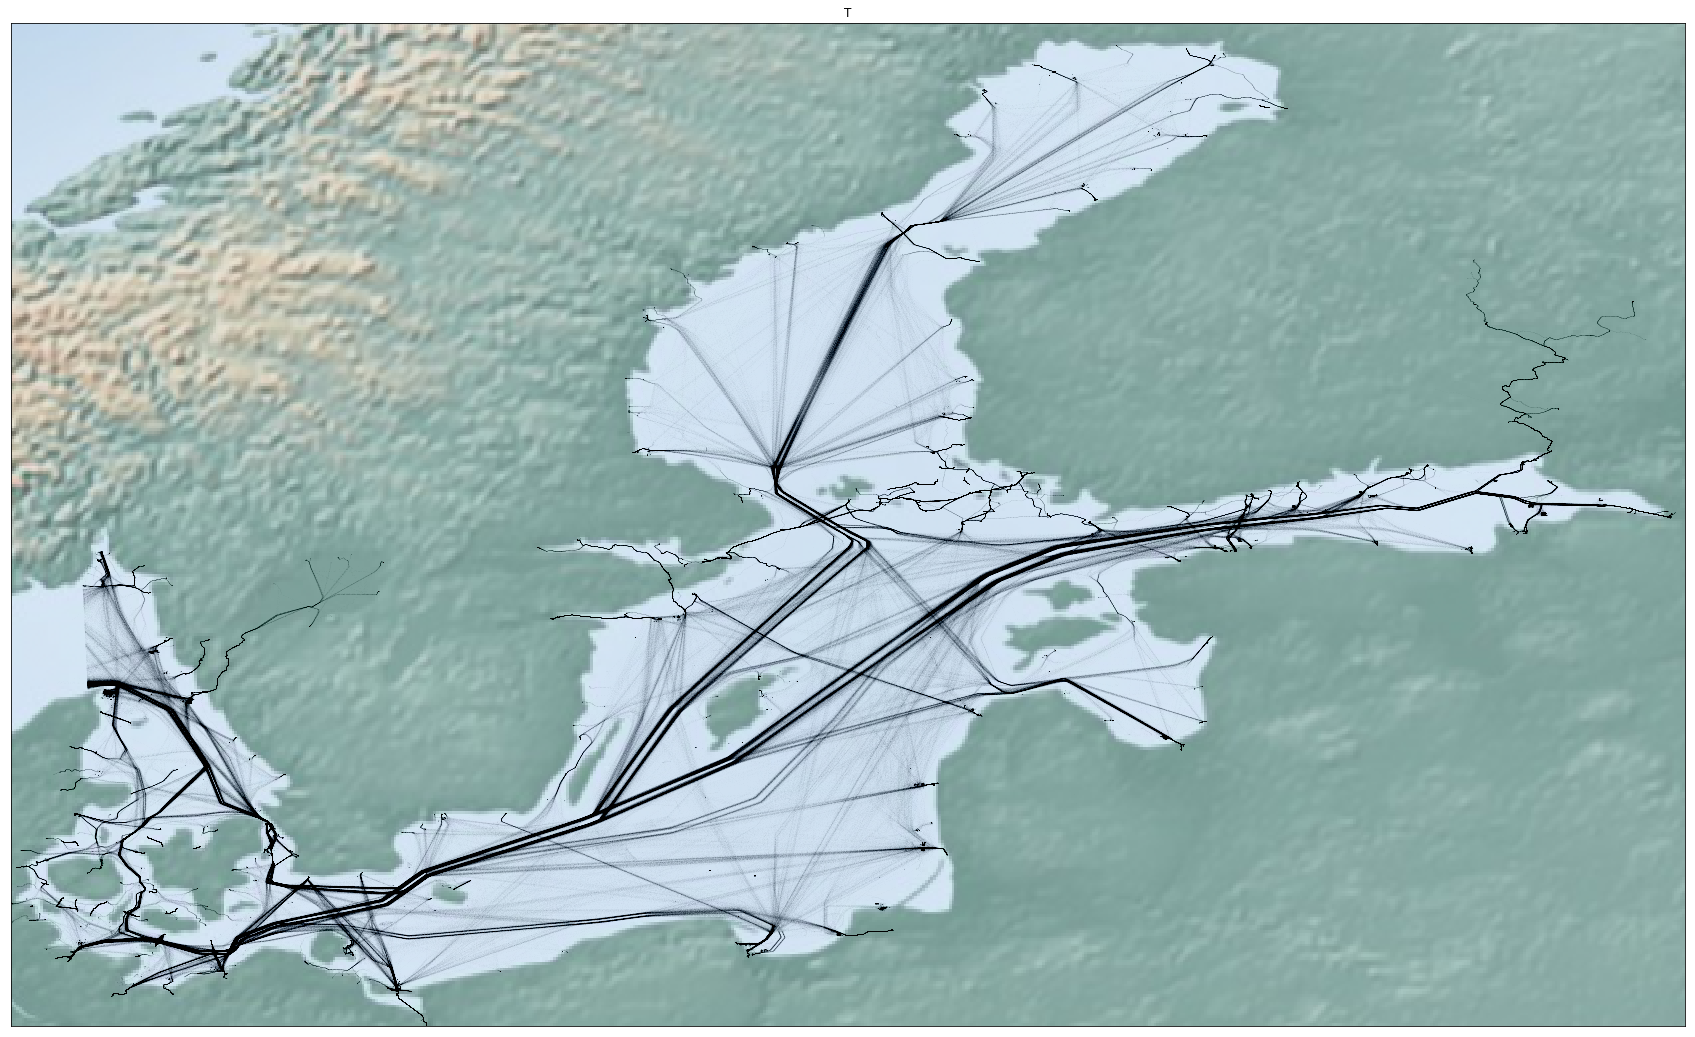

In [27]:
fig = plt.figure(figsize=(30,30))
plt.title(group)
m = Basemap(llcrnrlon = ais_moving.lon.min(),llcrnrlat = ais_moving.lat.min(), urcrnrlon = ais_moving.lon.max(),
       urcrnrlat = ais_moving.lat.max(),
       resolution='l')
m.shadedrelief()
xy = ais_moving.loc[:, ('lat', 'lon')]
plt.plot(xy.loc[:, ('lon')], xy.loc[:, ('lat')], 'o', c='black', alpha=0.005, markersize=1)
plt.show()

In [6]:
print(ais.timestamp.min())
print(ais[ais.timestamp < '2018-03-01'].timestamp.max())
print(ais[ais.timestamp > '2018-03-01'].timestamp.min())
print(ais.timestamp.max())

2017-11-01 09:08:40
2018-01-17 23:57:57
2018-05-18 00:01:49
2018-10-21 17:22:18


In [7]:
print('len of ais:        ', len(ais.mmsi))
print('len of aismoving:  ', len(ais_moving.mmsi))

len of ais:         14185046
len of aismoving:   9476581


In [8]:
print('Unique vessels:', len(ais_moving.mmsi.drop_duplicates()))

Unique vessels: 1829


In [9]:
# Vessel type distribution
(ais_moving.vessel_type.dropna().value_counts(normalize=True)*100)

GC      46.972363
T       20.552887
PAS     15.272280
CONT     9.347759
RORO     7.854710
Name: vessel_type, dtype: float64

In [10]:
ais_types = ais.groupby('vessel_type')
rows = []
for vessel_type, observations in ais_types:
    print(vessel_type + ' Mean speed:', observations.speed.mean())
    print(vessel_type + ' Median speed:', observations.speed.median())
    rows.append([vessel_type, observations.speed.mean()])
    
mean_speeds = pd.DataFrame(rows, columns=['Vessel Type', 'Mean Speed (m/s)'])

CONT Mean speed: 5.459597541045624
CONT Median speed: 6.64
GC Mean speed: 3.3348079296097
GC Median speed: 4.63
PAS Mean speed: 4.047695112166357
PAS Median speed: 4.32
RORO Mean speed: 6.161657025037233
RORO Median speed: 7.72
T Mean speed: 3.5503285985118547
T Median speed: 4.84


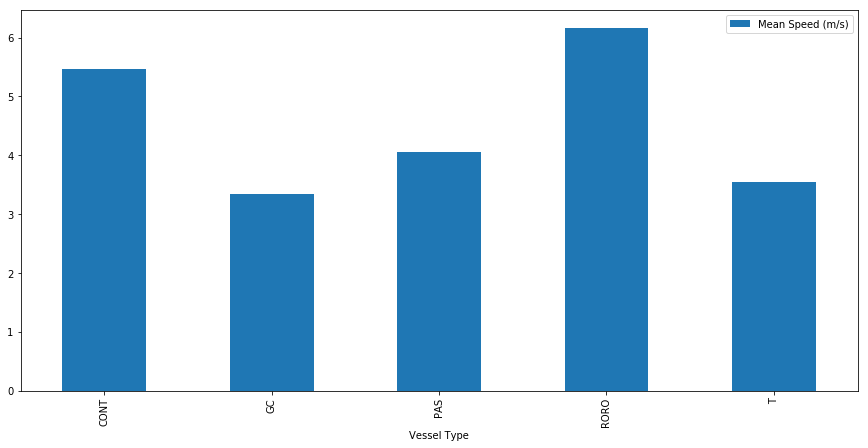

In [11]:
mean_speeds = mean_speeds.set_index('Vessel Type')
mean_speeds.plot(kind='bar',figsize=(15,7))

##### Describing AIS observations by vessel types

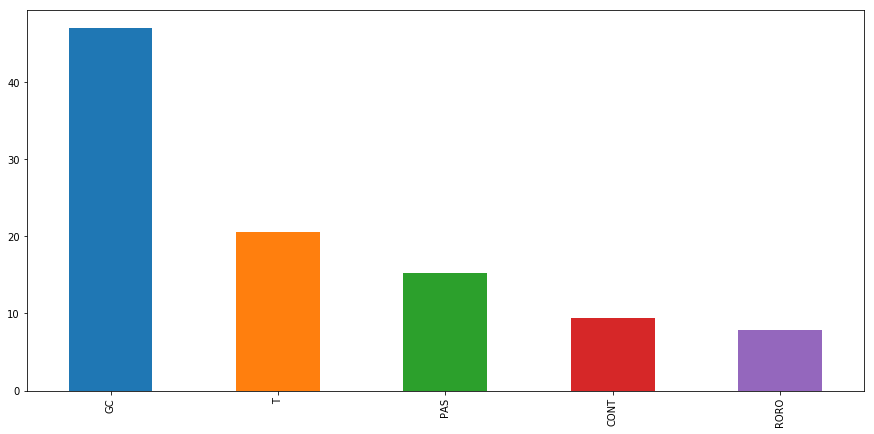

In [12]:
# The most common vessel types in AIS observations
(ais_moving.vessel_type.dropna().value_counts(normalize=True)*100).plot(kind='bar',figsize=(15,7))

In [13]:
type_groups = ais.vessel_type.dropna().drop_duplicates().reset_index(drop=True)
type_groups = type_groups.to_dict()
type_groups = {v: k for k, v in type_groups.items()}
type_groups

{'T': 0, 'RORO': 1, 'GC': 2, 'CONT': 3, 'PAS': 4}

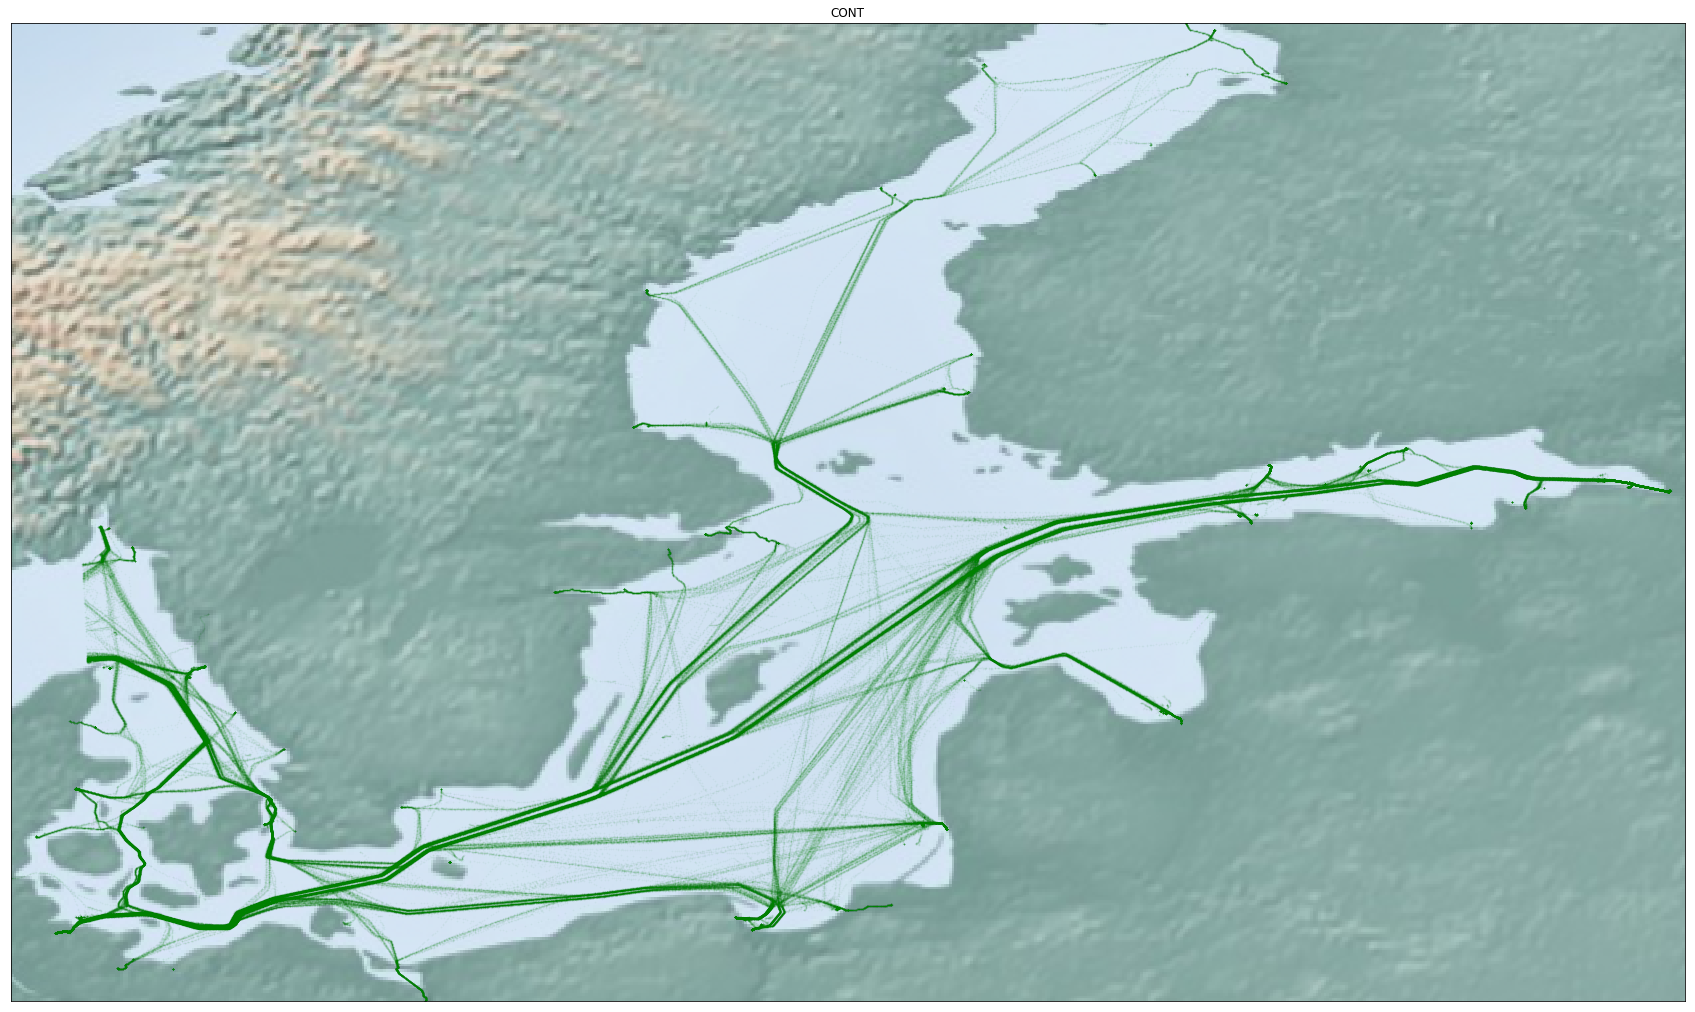

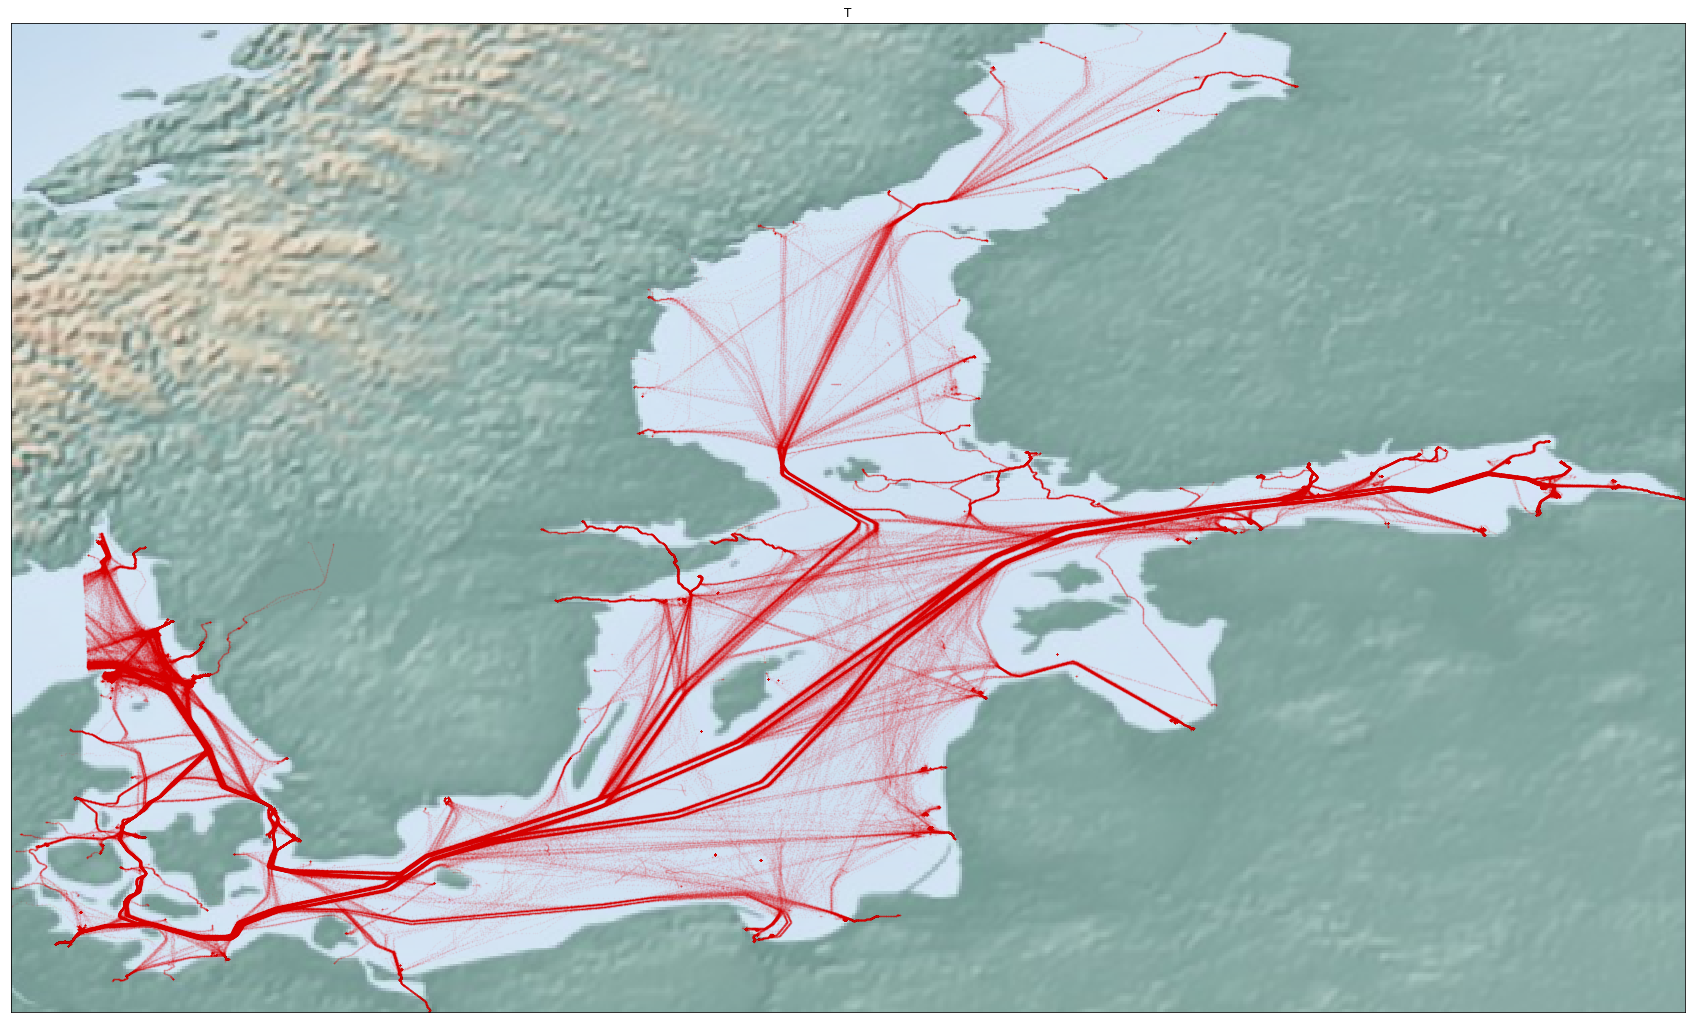

In [15]:
ais_summer_draft_groups = ais_moving.groupby('vessel_type')
#colors = {1:'red', 2:'blue', 3:'green', 4:'black', 5:}

colors = ['red', 'grey', 'blue', 'green', 'black']

for group, observations in ais_summer_draft_groups:
    fig = plt.figure(figsize=(30,30))
    plt.title(group)
    m = Basemap(llcrnrlon = observations.lon.min(),llcrnrlat = observations.lat.min(), urcrnrlon = observations.lon.max(),
           urcrnrlat = observations.lat.max(),
           resolution='l')
    m.shadedrelief()
    xy = observations.loc[:, ('lat', 'lon')]
    color = colors[type_groups[group]]
    plt.plot(xy.loc[:, ('lon')], xy.loc[:, ('lat')], 'o', c=color, alpha=0.025, markersize=1)
    plt.show()